#Pergunta fundamental

Quanto aumentarão as vendas se aumentarmos o invetimento em marketing?

#1 Modelando relações


Já vimos que podemos constuir experimentos estatísticos e estimar o impacto de variáveis categóricas sobre variáveis contínuas. Também vimos que é possível modelar um conjunto de dados como uma distribuição de probabilidade, mas como fazemos para **modelar uma variável contínua em função de uma ou mais variáveis contínuas**?

Este processo é bem comum na engenharia e na física. Um modelo do tipo $S = S_0 + vt$ é uma relação **determinística**. Entretanto, estamos interessados em encontrar relações do tipo $y=f(\textbf{x})$ onde o valor da resposta de interesse $y$ (ex: consumo de energia) não pode ser previsto <u>perfeitamente</u> a partir do conhecimento do vetor de variáveis $\textbf{x}$ (ex: tamanho da casa, quantidade de moradores e quantidade de eletrodomésticos). Então procuramos por um **modelo empírico** em que estas relações **não determinísticas** são modeladas. Para isto usamos a **análise de regressão**.

A análise de regressão é apenas um dos problemas para os quais a estatística fornece métodos para tratar incertezas. Alguns outros problemas são:
* Classificação
* Seleção e criação de variáveis
* Agrupamento
* Simulação



##1.1 Regressão Linear

Em um problema de regressão nós queremos criar um modelo que capture a variabilidade da **variável dependente** ($y$) em função das **variáveis independentes** ($\textbf{x}$), a partir de uma amostra de observações destas variáveis. De posse de um modelo podemos usá-lo para <u>interpolar</u> (estimar no domínio da observação) e <u>extrapolar</u> (estimar para além do domínio da observação). Também podemos usá-lo na <u>otimização</u> de processos ou para <u>controlar</u> um processo.

Neste caso assumimos que $Y$ é uma VA cujo valor depende do vetor $\textbf{x}$ (que não precisa ser uma VA, necessariamente), assim a resposta de $Y$ para um certo ponto no espaço $\textbf{x}^*$ têm uma distribuição de probabilidade e a função prediz o valor esperado de $Y$ dado $\textbf{x}^*$ (i.e., $E(Y|\textbf{x}^*)$).

A imagem abaixo exemplifica esta ideia, assumindo uma relação linear entre duas variáveis (Nível de Hidrocarboneto como variável independente e Pureza do oxigênio como variável dependente) onde $\beta_1$ é o coeficiente angular e $\beta_0$ o coeficiente linear do modelo. Dado um valor $x^*$ temos que $E(Y|x^*) = \beta_1 \times x^* + \beta_0$.

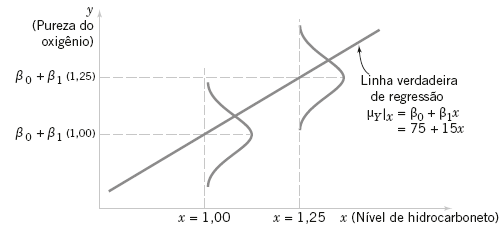



O modelo linear, tal qual usado acima, é uma das formas mais simples de modelar as relações e a despeito disso existem muitos problemas práticos que caem nessa estrutura. Por exemplo, você pode encontrar uma relação linear considerável entre o comprimento de um peixe e seu peso ([vide aqui](http://jse.amstat.org/jse_data_archive.htm), procure por ```fishcatch.txt```) ou entre a [temperatura ambiente e a frequência do chilrear dos grilos](https://mste.illinois.edu/patel/amar430/keyprob1.html).


Consideremos um modelo linear probabilístico genérico tal que $Y$ é uma VA cujo valor é determinado por uma função linear de $k$ **variáveis regressoras** $x_k$ (com $k+1$ coeficientes) mais um termo de erro aleatório:

$Y = \textbf{x}\textbf{b} + e$

onde $\textbf{x}$ é o vetor de variáveis regressoras $\textbf{x} = \begin{bmatrix}
1 & x_1 & x_2 & \ldots & x_k\\
\end{bmatrix}
$, $\textbf{b}$ é o vetor de coeficientes $\textbf{b} = \begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots \\
b_k
\end{bmatrix}
$ e $e$ representa o termo do erro aleatório.

**Nota**: Comumente divide-se o assunto à respeito de **regressão linear** em <u>regressão linear simples</u> ($k=1$) e <u>regressão linear múltipla</u> ($k \gt 1$). A vantagem desta divisão é didática, já que simplifica o problema e permite capturar mais facilmente a essência do método por meio de um gráfico de dispersão. Aqui nós tentaremos explicar sempre a forma mais genérica, e usaremos a regressão linear simples quando for necessário passar uma ideia mais complexa.

Suponha que $e \sim \mathcal{N}(0,\sigma)$, logo, para um $\textbf{x}^*$ fixo, $Y$ também terá também uma distribuição normal com os seguintes parâmetros:

$E(Y|\textbf{x}^*) = E(\textbf{x}^*\textbf{b} + e) = E(\textbf{x}^*\textbf{b}) + E(e) = \textbf{x}^*\textbf{b}$

e

$Var(Y|\textbf{x}^*) = Var(\textbf{x}^*\textbf{b} + e) = Var(e) = \sigma^2$

Desta forma, vemos que o modelo de regressão ($\textbf{x}\textbf{b}$) é um hiperplano de valores médios, ou seja, o cálculo da regressão é apenas a média de $Y$ para aquele $\textbf{x}^*$. Os coeficientes $b_k$ podem ser então interpretados como a mudança na média de $Y$, quando $x_k$ muda. Além disso, observe que há uma distribuição de valores de $Y$ em cada $\textbf{x}^*$ e que a variância dessa distribuição ($\sigma^2$) é a mesma em cada $\textbf{x}^*$.

##1.2 Estimação dos parâmetros

Na maioria dos problemas reais, os valores dos coeficientes $\textbf{b}$ e a variância do erro $\sigma^2$ não serão conhecidos e devem ser estimados a partir de uma amostra. Para tanto, poderemos usar a técnica da estimativa por máxima verossimilhança.

Suponha que haja $k$ variáveis regressoras e $n$ observações (com $n \gg k$) formando assim $n$ vetores de observações do tipo $\textbf{x}_i= \begin{bmatrix}
1 & x_{i1} & x_{i2} & \ldots & x_{ik}\\
\end{bmatrix}
$, para os quais temos uma observação correspondente $y_i$ da variável dependente.

Lembremos que $Y$ é uma VA, assim o log da verossimilhança é dado por

$\log{L(\textbf{b},\sigma)} = \sum_{i=1}^n \log{P(y_i|\textbf{x}_ib,\sigma)} \\
\log{L(\textbf{b},\sigma)} = \sum_{i=1}^n \log{[\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_i-\textbf{x}_i\textbf{b}}{\sigma})^2}]} \\
\log{L(\textbf{b},\sigma)} = n\log{\frac{1}{\sigma\sqrt{2\pi}}} - \sum_{i=1}^n\frac{(y_i-\textbf{x}_i\textbf{b})^2}{2\sigma^2} $

Podemos então obter $\textbf{b}$ encontrando o máximo de $\log{L(\textbf{b},\sigma)}$ que é o mesmo que encontrar o mínimo de $-\log{L(\textbf{b},\sigma)}$. Observe que ao resolvermos $\frac{\partial (-\log{L(\textbf{b},\sigma)})}{\partial \textbf{b}}=0$ a parte que realmente importa é a quantidade $e_i = (y_i-\textbf{x}_i\textbf{b})$, que é a diferença da observação $i$ da variável dependente pela estimativa do seu valor esperado, denominado resíduo.

Em outras palavras estamos procurando $\hat{\textbf{b}}$ que minimiza a soma quadrática dos resíduos ($\sum_{i=1}^n e_i^2$). O qual pode ser resolvido pela solução de um sistema de $n$ equações lineares com $k$ incógnitas.

Coloquemos isto em notação matricial. Seja $\textbf{X}$ a matriz formadas pelos diversos $\textbf{x}_i$, $\textbf{y}$ o vetor coluna das observações da variável dependente e $\textbf{e}$ o vetor dos resíduos temos que $\textbf{y} = \textbf{X}\textbf{b} + \textbf{e}$. Logo, dizemos que queremos encontrar $\hat{\textbf{b}}$ tal que $\textbf{e}^T\textbf{e}$ é mínimo. Este método de estimativa de parâmetros é chamado de **mínimos quadrados**.

**Visão geométrica do método dos mínimos quadrados**

https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html

A estimativa de $\hat{\textbf{b}}$, na forma matricial, é dada por  $\hat{\textbf{b}} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$, a estimativa do modelo para cada observação $i$ é calculada por
$\hat{\textbf{y}} = \textbf{X}\hat{\textbf{b}}$ e os resíduos são calculados por $\textbf{e} = \textbf{y} - \hat{\textbf{y}}$.

A variância $\sigma^2$ é estimada por $\hat{\sigma}^2 = \frac{\textbf{e}^T\textbf{e}}{n-p} = \frac{\sum_{i=1}^ne_i^2}{n-p} = \frac{SSE}{n-p}$. SSE (*Sum of squared errors*) é o termo para a soma dos quadrados dos resíduos e $p$ é o número de parâmetros estimados no modelo ($p = k + 1$).

##1.3 Modelos mais complexos

A regressão linear múltipla é usada para estabelecer funções de aproximação, isto significa que a verdadeira relação funcional entre $Y$ e $\mathbf{x}$ é desconhecida; porém, no domínio observado das variáveis independentes, o modelo obtido é uma aproximação adequada.

A regressão permite ainda que modelos mais complexos sejam criados e avaliados usando a mesma técnica. Por exemplo, modelos de maior **ordem**, como o modelo cúbico $Y = b_0 + b_1 x + b_2 x^2 + b_3 x^3 +e$, podem ser representados por um modelo de regressão múltipla, no caso $Y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 +e$, onde $x_1 = x$, $x_2 = x^2$ e $x_3 = x^3$. Em outras palavras, a partir de $x$ observado, criamos novas variáveis com diferentes potências de $x$ e usamos isto para computar o modelo desejado.

A **interação** entre variáveis regressoras também pode ser capturada adicionando novas variáveis ao modelo. O modelo $Y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_1x_2$ é substituído pelo modelo $Y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3$, em que $x_3 = x_1x_2$. Esta nova variável é criada multiplicando as respectivas observações de $x_1$ e $x_2$.

A mesma técnica pode ser usada para adicionar outros termos como $\log{x}$, $\sqrt{x}$ etc. Todos estes modelos que, após transformação adequada, podem ser expressas como um hiperplano são chamados **intrinsecamente lineares**.

#2 Regressão linear na prática

Na prática usamos um pacote de software para o cálculo dos coeficientes da regressão linear. Vamos começar por um exemplo simples.

##2.1 Exemplo (Lei de Hooke)

A Lei de Hooke estabelece uma relação entre a deformação linear sofrida por um corpo elástico (mola) sob determinada força: $F = k\Delta l$, em que $F$ é a força aplicada sobre o corpo elástico, $\Delta l$ é a deformação linear (achatamento ou prolongamento) e $k$ a constante elástica.

<img src="https://blog.nakata.com.br/wp-content/uploads/2019/09/306420-voce-sabe-identificar-o-momento-de-trocar-o-amortecedor-da-moto-confira-nossas-dicas.jpg" height=200px/>

Sabendo a constante $k$ podemos, por exemplo, estimar quanto o motoqueiro deve pesar para que a mola de amortecimento seja comprimida em 1 cm. Neste caso, supondo $k=35000$ N/m, calculamos $F = k \Delta l = 35000 \times 0.01 = 350$ N. Assumindo que apenas a força da gravidade atua diretamente sobre o conjunto, temos que $F = mg \Rightarrow m = \frac{350}{9.81} = 35.68$ Kg.

Mas dada uma mola, como determinamos $k$?

Da análise acima sabemos que $k$ é o coeficiente angular da relação entre $F$ e $\Delta l$. Além disso, dada uma massa submetida apenas à força da gravidade, podemos calcular a Força aplicada à mola. Neste caso, podemos submeter a mola à diferentes corpos de prova com massas diversas e para cada corpo de prova guardamos a distenção da mola.

<img src="https://1.bp.blogspot.com/-1Q7SFbFrTAs/X4EhtVwpx2I/AAAAAAACk28/UAc7HJMgf7oCY3bUgchcA-_ptVOc7ZAzgCLcBGAsYHQ/s402/mola%2Bhelicoidal.jpg" height=200px />

De posse destes dados, podemos usar a regressão linear para estimar a constante $k$, considerando a força como variável regressora e a distenção como variável dependente com o seguinte modelo $\Delta l = b_1 F + b_0$, em que $k = 1/b_1$

Dado o conjunto de dados abaixo, crie um modelo de regressão linear e estime $k$.

**Solução**:

Iniciamos observando os dados em um diagrama de dispersão. Para o caso da regressão simples, como é o caso, este passo pode ser feito com facilidade e nos permite ter uma boa compreenssão do problema.

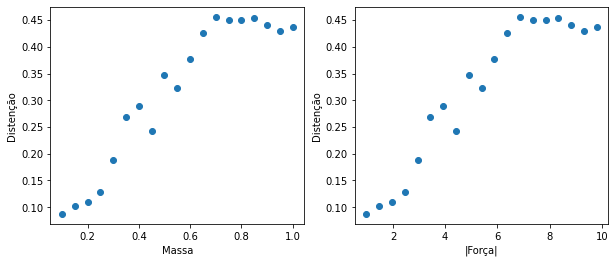

In [ ]:
import matplotlib.pyplot  as plt
import numpy as np

#distencao em metros
distencao = np.array([0.0865,	0.1015,	0.1106,	0.1279,	0.1892,	0.2695,	0.2888,	0.2425,	0.3465,	0.3225,	0.3764,	0.4263,	0.4562,	0.4502,	0.4499,	0.4534,	0.4416,	0.4304,	0.437])
#massa em kg
massa = np.array([0.1,	0.15,	0.2,	0.25,	0.3,	0.35,	0.4,	0.45,	0.5,	0.55,	0.6,	0.65,	0.7,	0.75,	0.8,	0.85,	0.9,	0.95,	1])
#módulo da Força em N
forca = 9.81*massa

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.scatter(massa,distencao)
plt.xlabel("Massa")
plt.ylabel("Distenção")

plt.subplot(1,2,2)
plt.scatter(forca,distencao)
plt.xlabel("|Força|")
plt.ylabel("Distenção")
plt.show()

Observe que o valor obtido não é uma relação determinística, dado que podemos ter erros de medição e interferência de outros fenômenos não controlados.

Um aspecto que podemos notar é que para forças maiores do que 6 N, o valor da distenção permanece quase constante, o que será que está ocorrendo?

De toda forma, vamos ignorar isto inicialmente e vamos criar um modelo de regressão linear.

[0.04643203] 0.06562859649122799


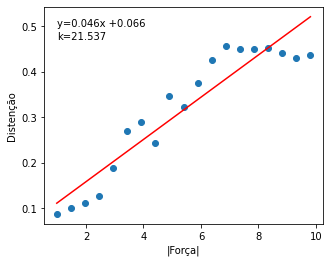

In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = forca.reshape(-1,1)
y = distencao
reg = lm.fit(X,y)
b1 = reg.coef_
b0 = reg.intercept_
yhat = X*b1[0]+b0

k = 1/b1[0]

print(reg.coef_,reg.intercept_)

plt.figure(figsize=(5, 4))
plt.scatter(forca,distencao)
plt.plot(X,yhat,"red")
plt.xlabel("|Força|")
plt.ylabel("Distenção")
plt.text(1,0.5,"y="+str(round(b1[0],3))+"x +"+str(round(b0,3)))
plt.text(1,0.47,"k="+str(round(k,3)))
plt.show()

O ajuste obtido é visualmente bom, mas o fenômeno que ocorre acima de $F=6$N e o termo $b_0$ que não aparece na teoria nos <u>indicam que algo parece errado</u>. Podemos gerar outros modelos, removendo dados acima de 6N ou removendo $b0$, mas como saberemos se eles são melhores do que este?

Em outras palavras, **como medir a qualidade de um modelo de regressão linear**?

##2.2 Qualidade de um modelo de regressão

Como a regressão linear está embasada em uma teoria estatística sólida três aspectos derivam daí:
1. Temos boa confiança estatística nos resultados da regressão (desde que as suposições sejam válidas);
2. Podemos checar a significância estatística dos resultados obtidos; e
3. Temos uma forma de fazer estimativas intervalares, baseada na variância dos dados,

O segundo e terceiro aspectos serão vistos mais tarde, vamos então ver como podemos verificar as suposições do modelo. Aqui usaremos técnicas similares às empregadas na análise de experimentos.

###2.2.1 Análise dos resíduos

Na análise dos resíduos verificaremos:
* Normalidade dos resíduos
  * Teste Shapiro-Wilk dos resíduos
  * Histograma e gráfico de quantis dos resíduos
* Presença de não-Linearidade
 * Gráfico de dispersão entre os valores de uma variável regressora e os resíduos. Não deve apresentar padrões.
* Homocedasticidade
 * Gráfico de dispersão entre os valores preditos - $\hat{\textbf{y}}$ - e os resíduos. Não deve apresentar padrões.
* Independência
 * Gráfico dos resíduos em ordem conhecida (ordem em que as observações foram obtidas)

###2.2.2 Coeficiente de determinação

Uma medida muito usada para capturar a qualidade de um modelo de regressão é o coeficiente de regressão ($R^2$), que é a razão da soma dos quadrados da regressão ($SSR$) e a soma dos quadrados totais ($SST$). Sendo $\bar{y}$ a média das observações da variável dependente, então podemos usar estas conhecidas equações

$SST = \sum_{i=1}^n(y_i - \bar{y})^2 \\
SSR = \sum_{i=1}^n(\hat{y_i} - \bar{y})^2\\
SSE = \sum_{i=1}^n(y_i - \hat{y_i})^2 \\
SST = SSR + SSE$

Portanto, o coeficiente de determinação indica o quanto da variabilidade total é explicada pelo modelo de regressão, formalmente temos

$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$

Deve-se observar que, no caso da regressão simples, este valor é o quadrado do coeficiente de correlação entre a variável dependente e a variável regressora.

Como a técnica que usamos para encontrar o melhor ajuste baseia-se na minimização do valor de SSE, então o ajuste obtido oferece $R^2$ máximo. Contudo, como veremos adiante, o acréscimo de variáveis explicativas  aumenta o $R^2$, ainda que marginalmente. Desta forma, **para modelos de regressão múltipla compensamos o valor pela a quantidade de variáveis regressoras**. Esta medida é chamada de $R^2$ ajustado.

$R^2_{\text{ajustado}} = 1 - \frac{\frac{SSE}{n-p}}{\frac{SST}{n-1}} = 1 - (1-R^2)\frac{n-1}{n-p}$

Há várias interpretações incorretas a respeito de $R^2$. Em geral, esta métrica **NÃO mede a magnitude do coeficiente angular da linha de regressão**. Um grande valor de $R^2$ não implica um coeficiente angular pronunciado. Outro aspecto é que mesmo que $R^2$ seja um valor próximo de 1, isso não implica necessariamente que o modelo de regressão forneça previsões exatas, isto depende da variância $\sigma^2$ do modelo (veremos mais sobre isso na seção sobre previsão).



###2.2.3 Exemplo (Lei de Hooke)

Faça a análise dos resíduos para o modelo encontrado anteriormente e calcule o coeficiente de determinação.

**Solução**: Faremos abaixo todos os gráficos e testes de uma só vez para análise.

R² 0.8815123983595092
R² ajustado 0.8745425394394803
(correlacao)² 0.8815123983595093
Teste Shapiro-Wilk para normalidade
(0.9531981945037842, 0.44709593057632446)


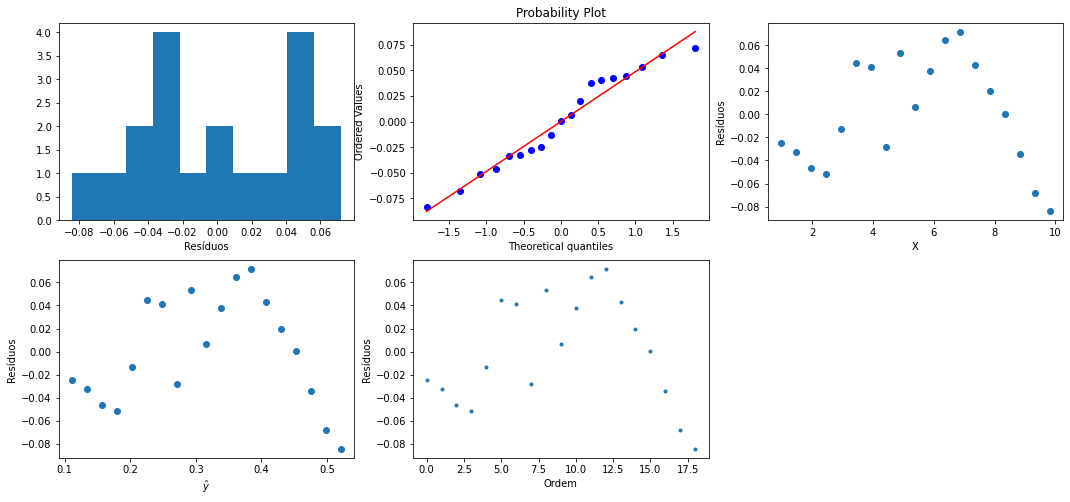

In [ ]:
import scipy.stats as st

n = 19
p = 2

print("R²",reg.score(X,y))
print("R² ajustado",1-(1-reg.score(X,y))*((n-1)/(n-p)))
print("(correlacao)²",np.corrcoef(forca,distencao)[0,1]**2)

yhat = yhat.reshape(1,19)

e = y - yhat
print("Teste Shapiro-Wilk para normalidade")
print(st.shapiro(e))
plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
plt.hist(e[0])
plt.xlabel("Resíduos")

plt.subplot(2,3,2)
st.probplot(e[0], dist="norm",plot=plt)

plt.subplot(2,3,3)
plt.scatter(X,e)
plt.xlabel("X")
plt.ylabel("Resíduos")

plt.subplot(2,3,4)
plt.scatter(yhat,e)
plt.xlabel("$\hat{y}$")
plt.ylabel("Resíduos")

plt.subplot(2,3,5)
plt.plot(e[0],'.')
plt.xlabel("Ordem")
plt.ylabel("Resíduos")
plt.show()

Embora os resíduos apresentem normalidade e o valor de $R^2$ seja alto, há um padrão claro nos resíduos, na parte em que a força excede 6N. Isso indica que o modelo ajustado não é adequado.

O que poderíamos fazer neste caso?

##2.3 Significância de um modelo de regressão

Podemos verificar a significância da regressão usando o teste ANOVA que vimos anteriormente para descobrir se algum dos coeficientes é significante. Podemos ainda testar a significância de cada coeficiente individualmente.

###2.3.1 Tabela ANOVA para regressão

A tabela ANOVA sumariza os resultados do teste ANOVA. Este teste tem formato similar ao usado no projeto de experimentos. O teste tem as seguintes hipóteses:
$H_0: b_1 = b_2 = \ldots = b_k = 0 \\
H_a: b_j \neq 0, \, \text{para no mínimo um }j$

Em outras palavras queremos ver se ao menos um dos coeficientes do modelo, <u>excetuando o coeficiente linear ($b_0$)</u>, é significativo.

Neste teste computamos $SSR$ e $SSE$ e usamos os graus de liberdade para computar o MQR (média dos quadrados da regressão, $MQR = \frac{SSR}{k}$) e o MQE (média dos quadrados dos resíduos, $MQE = \frac{SSE}{n-p}$). Por sua vez, estes são usados para computar o valor F ($F_0 = \frac{MQR}{MQE}$) e o valor p é computado por

$\text{p-valor} = 1-F_{\text{Distribuição F}}(F_0;d_1;d_2)$

com $d_1 = k$ e $d_2 = n-p$.

Por fim, a tabela ANOVA é montada da seguinte forma.

| |Graus de liberdade|Soma quad.|Média quad.|Valor F|Valor p|
|---|----|----|----|----|----|
|**Regressão**| k |SSR|MQR|MQR/MQE|p-valor
|**Resíduos**| n-p|SSE|MQE|

###2.3.2 Testes para os coeficientes individuais

Considere um valor qualquer $b_j^*$ que pensamos ser o real valor do parâmetro $b_j$ (para $j=1,\ldots,k$). As hipóteses do teste são:

$H_0: b_j = b_j^* \\
H_a: b_j \neq b_j^*$

Também podemos fazer o teste com $H_a: b_j \gt b_j^*$ ou $H_a: b_j \lt b_j^*$.

A estatística do teste é $T_0 = \frac{\hat{b_j}-b_j^*}{ep(\hat{b}_j)}$, em que $ep(\hat{b}_j)$ é o erro padrão (ep) estimado de $\hat{b}_j$ dado por $ep(\hat{b}_j) = \sqrt{\hat{\sigma}^2C_{jj}}$. Já vimos como obter $\hat{\sigma}^2$ e $C_{jj}$ é o $j$-ésimo elemento da diagonal principal da matriz $\textbf{C} = (\textbf{X}^T\textbf{X})^{-1}$.

**Sob as condições estabelecidas para modelos de regressão** e assumindo $H_0$ como verdadeira, a estatística $T_0$ se distribui como uma T de Student com $n-p$ graus de liberdade. Portanto, podemos calcular o valor p para este teste de hipótese da seguinte forma:

$H_a: b_j \neq b_j^* \Rightarrow \text{valor p} = 2\times (1 - F_{T(n-p)}(|T_0|)) \\
H_a: b_j \lt b_j^* \Rightarrow \text{valor p} = F_{T(n-p)}(T_0) \\
H_a: b_j \gt b_j^* \Rightarrow \text{valor p} = 1-F_{T(n-p)}(T_0)$

###2.3.3 Exemplo (Dados misteriosos)

Considere o conjunto misterioso de dados abaixo. Procure encontrar um modelo de regressão linear adequado.

**Solução**: Iniciamos observando os dados e já detectamos uma clara não-linearidade. Portanto testaremos os dados contra três modelos diferentes: um modelo linear ($y = l_0 + l_1x$), outro quadrático ($y= q_0+q_1x+q_2x^2$) e outro cúbico ($y = c_0 + c_1x + c_2x^2 + c_3x^3$) e os avaliaremos.

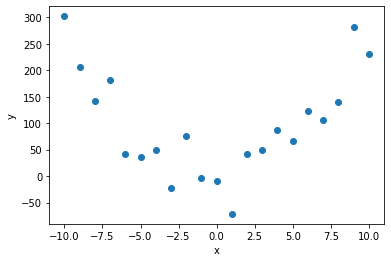

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,11)
y = [301.8267195898913,206.48068590297993,141.3506905750422,181.45188429363267,
     41.78127527790235,36.74157682849997,49.77129275587662,-21.54843159015938,
     75.4361571381737,-3.8882674060444335,-9.46856287330992,-71.3194584463108,
     42.1215633120422,49.088012341286515,86.97664315575287,66.69982327495062,
     122.96273379072505,105.46219673639621,139.43161572804308,281.7900813768265,
     229.67424006279856]

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Como os modelos quadrático e cúbico são intrinsecamente lineares, estimaremos os parâmetros de todos os modelos por meio da regressão linear.

97.75345103928551 [0.35393466]
-1.6358821985436833 [0.35393466 2.71061818]
-1.6358821985437118 [ 4.26156946  2.71061818 -0.05938655]


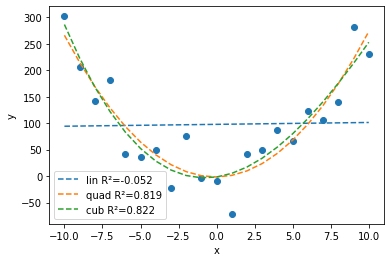

In [ ]:
from sklearn import linear_model

n = len(x)

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

X = x.reshape(-1,1)

modelos = {"lin":None, "quad":None, "cub":None}

for m in modelos.keys():
  if m == "quad":
    x2 = x**2
    X = np.hstack((x,x2)).reshape(n,2,order='F')
  elif m == "cub":
    x3 = x**3
    X = np.hstack((x,x2,x3)).reshape(n,3,order='F')
  lm = linear_model.LinearRegression()
  reg = lm.fit(X,y)
  modelos[m] = (reg,X) #armazenando pra depois
  print(reg.intercept_,reg.coef_)
  yhat = reg.predict(X)
  p=len(reg.coef_)+1
  r2 = 1-(1-reg.score(X,y))*((n-1)/(n-p)) #R2 Ajustado
  plt.plot(x,yhat,'--',label=m+" R²="+str(round(r2,3)))
  plt.xlabel("x")
  plt.ylabel("y")
plt.legend()
plt.show()

Pela análise gráfica e do $R^2$ vemos que o modelo linear tem baixa aderência aos dados. Verifiquemos as suposições da regressão para os  outros modelos.

Modelo: lin
Teste Shapiro-Wilk para normalidade
(0.9615871906280518, 0.5486629605293274)


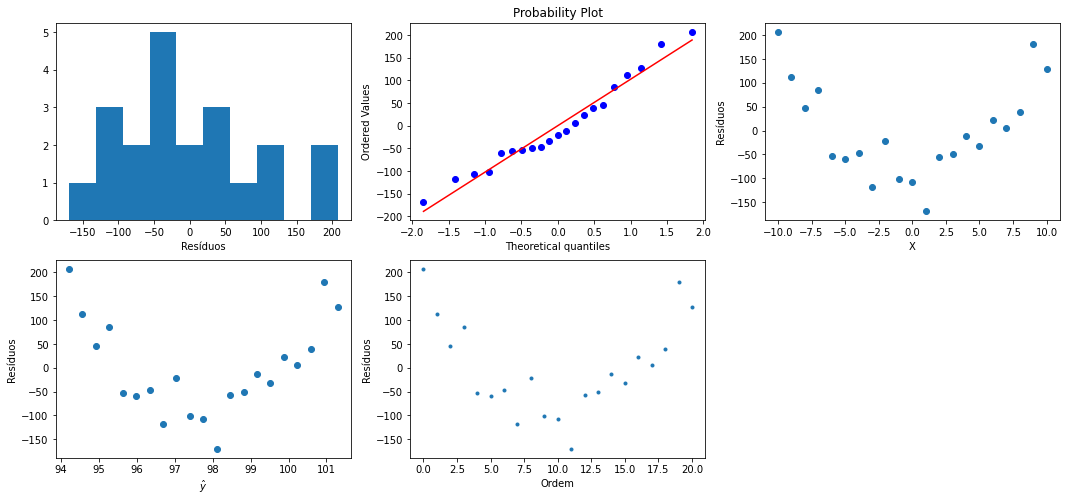

Modelo: quad
Teste Shapiro-Wilk para normalidade
(0.9653211236000061, 0.6289288997650146)


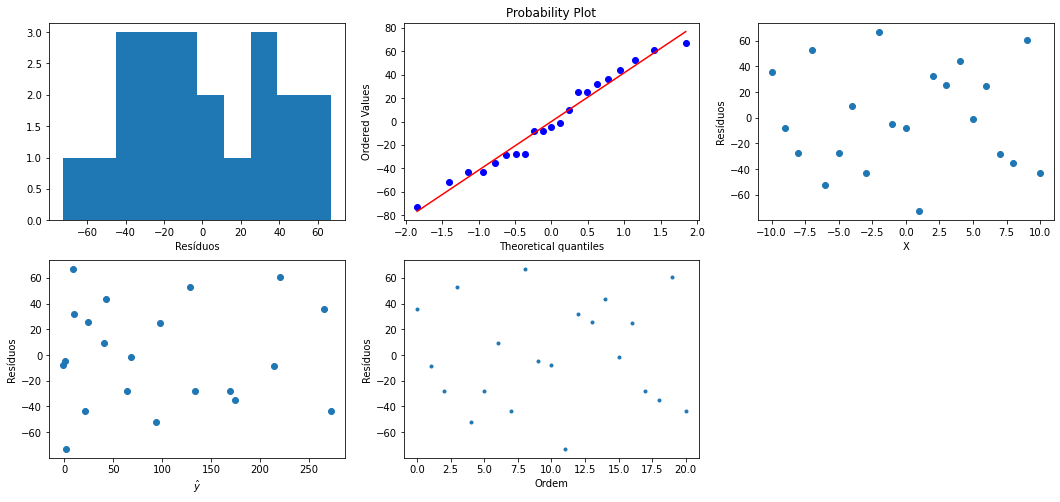

Modelo: cub
Teste Shapiro-Wilk para normalidade
(0.9641595482826233, 0.6034987568855286)


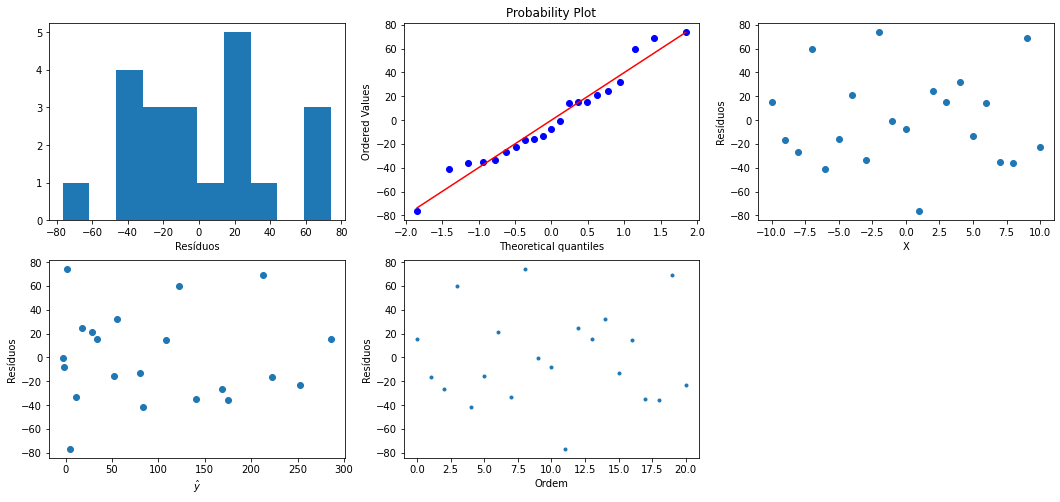

In [ ]:
def analise_residuos(X,y,modelo):
  n,k = X.shape
  p=k+1
  yhat = modelo.predict(X)
  yhat = yhat.reshape(1,n)
  e = y - yhat

  print("Teste Shapiro-Wilk para normalidade")
  print(st.shapiro(e))
  plt.figure(figsize=(18,8))

  plt.subplot(2,3,1)
  plt.hist(e[0])
  plt.xlabel("Resíduos")

  plt.subplot(2,3,2)
  st.probplot(e[0], dist="norm",plot=plt)

  plt.subplot(2,3,3)
  plt.scatter(X[:,0],e)
  plt.xlabel("X")
  plt.ylabel("Resíduos")

  plt.subplot(2,3,4)
  plt.scatter(yhat,e)
  plt.xlabel("$\hat{y}$")
  plt.ylabel("Resíduos")

  plt.subplot(2,3,5)
  plt.plot(e[0],'.')
  plt.xlabel("Ordem")
  plt.ylabel("Resíduos")
  plt.show()

for m in modelos.keys():
  print("Modelo: "+m)
  modelo,X = modelos[m]
  analise_residuos(X,y,modelo)

Verificamos que os modelos quadrático e cúbico não violam as condições de normalidade, linearidade (intrínseca no caso), homocedasticidade e independência. Faremos o teste ANOVA para estes dois modelos.

In [ ]:
import scipy.stats as st

def testeANOVA(X,y,modelo):
  n,k = X.shape
  p=k+1
  yhat = modelo.predict(X)
  yhat = yhat.reshape(1,n)
  e = y - yhat
  ybar = np.average(y)

  SSE = np.sum(e**2)
  SSR = np.sum((yhat-ybar)**2)
  d1 = k
  d2 = (n-p)
  MQR = SSR/d1
  MQE = SSE/d2
  F0 = MQR/MQE
  pvalor = 1 - st.f.cdf(F0,d1,d2)
  print("\t\t G. lib.\t S. quad. \tM. quad. Valor F  Valor p")
  print("Regressão \t",d1,"\t\t",round(SSR,2)," \t",round(MQR,2),"\t ",round(F0,3),"  ",round(pvalor,8))
  print("Resíduos \t",d2,"\t\t",round(SSE,2),"\t",round(MQE,2))

for m in modelos.keys():
  print("Modelo: "+m)
  modelo,X = modelos[m]
  testeANOVA(X,y,modelo)
  print("")

Modelo: lin
		 G. lib.	 S. quad. 	M. quad. Valor F  Valor p
Regressão 	 1 		 96.46  	 96.46 	  0.009    0.92413841
Resíduos 	 19 		 196827.35 	 10359.33

Modelo: quad
		 G. lib.	 S. quad. 	M. quad. Valor F  Valor p
Regressão 	 2 		 164919.37  	 82459.69 	  46.377    8e-08
Resíduos 	 18 		 32004.43 	 1778.02

Modelo: cub
		 G. lib.	 S. quad. 	M. quad. Valor F  Valor p
Regressão 	 3 		 167116.5  	 55705.5 	  31.771    3.4e-07
Resíduos 	 17 		 29807.3 	 1753.37



O teste ANOVA revela que algum dos coeficientes dos modelos quadrático e cúbico não é zero, então faremos os testes individuais para $q_1$ e $q_2$, no caso quadrático, e $c_1$, $c_2$, $c_3$, no caso cúbico. Verificamos se algum destes é zero.


In [ ]:
import scipy.stats as st

def testeTcoef(bhat,bstar,epb,gl,alternative="two-tailed"):
  t0 = (bhat - bstar)/epb
  if (alternative == "less"):
    p = st.t.cdf(t0,gl)
  elif (alternative == "greater"):
    p = 1-st.t.cdf(t0,gl)
  else:
    p = 2*(1-st.t.cdf(abs(t0),gl))
  print("t0",t0,"pvalor",p)

for m in modelos.keys():
  print("Modelo: "+m)
  modelo,X = modelos[m]
  n,k = X.shape
  p = k+1

  yhat = modelo.predict(X)
  yhat = yhat.reshape(1,n)
  e = y - yhat
  SSE = np.sum(e**2)
  sigma2_hat = SSE/(n-p)

  ones = np.ones((n,1))
  X1 = np.hstack((ones,X))
  C = np.linalg.inv(np.dot(X1.transpose(),X1))

  i = 1
  for coef in modelo.coef_:
    print(i,coef)
    epb = np.sqrt(sigma2_hat*C[i][i])
    testeTcoef(coef,0,epb,n-p)
    i += 1
  print("")

Modelo: lin
1 0.3539346627630483
t0 0.09649449591424476 pvalor 0.9241384064957896

Modelo: quad
1 0.35393466276304836
t0 0.23291618519816903 pvalor 0.8184544720744205
2 2.7106181792135238
t0 9.628087012514419 pvalor 1.5951522769341864e-08

Modelo: cub
1 4.261569461292621
t0 1.1205855703724883 pvalor 0.2780457608453957
2 2.710618179213524
t0 9.695538300717349 pvalor 2.4312777346935377e-08
3 -0.05938654709011493
t0 -1.1194140789901568 pvalor 0.2785310811536641



Aqui observamos que o termo de segunda ordem é significante (à 95% de confiança) nos modelos quadrático e cúbico. Sobre o termo de terceira ordem não temos evidência estatística para afirmar nem que ele é diferente de zero e nem que é igual. Contudo, este resultado, como um todo, parece indicar que o modelo quadrático é mais indicado para este caso.

#3 Trabalhando com a complexidade

Nós vimos que é possível verificarmos a significância dos coeficientes, mas será que temos outra forma de escolher entre modelos, sem precisar recorrer aos testes? **Será que podemos organizar nosso processo de modelagem de modo diminuir as chances de termos um modelo "ruim"**?

##3.1 Exemplo (Dados misteriosos)

Veja abaixo alguns modelos com os dados misteriosos e avalie qual o melhor.

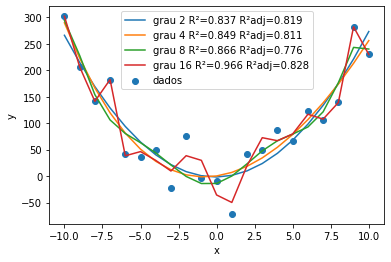

In [ ]:
import pylab as pb
from sklearn.metrics import r2_score

plt.scatter(x,y,label="dados")
plt.xlabel("x")
plt.ylabel("y")

n = len(x)

for d in [2,4,8,16]:
  p = d+1
  coefs = pb.polyfit(x,y,d)
  yhat = pylab.polyval(coefs, x)
  R2 = r2_score(y,yhat)
  R2ajustado = 1-(1-R2)*((n-1)/(n-p))

  plt.plot(x,yhat,label="grau "+str(d)+" R²="+str(round(R2,3))+" R²adj="+str(round(R2ajustado,3)))

plt.legend()
plt.show()

Os dados misteriosos foram gerados aleatoriamente obdecendo a seguinte relação $y = 3x^2 + \mathcal{N}(0,35)$, mas vimos que o polinômio com grau 16 tem melhor $R^2$ e $R^2_{\text{ajustado}}$, **o que está acontecendo**?

Para entendermos, vamos repetir o experimento, mas desta vez vamos gerar dois conjuntos de dados sintéticos a partir da relação.

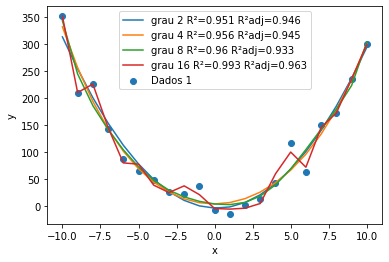

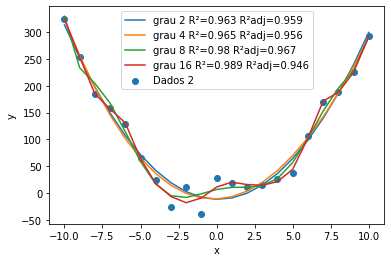

In [ ]:
import pylab as pb
import scipy.stats as st
from sklearn.metrics import r2_score

n = len(x)

dados1 = 3*x**2 + st.norm.rvs(0,35,size=n)
dados2 = 3*x**2 + st.norm.rvs(0,35,size=n)

dados = {"Dados 1":np.array(dados1),"Dados 2":np.array(dados2)}

modelos_poli = {"Dados 1": {2:None,4:None,8:None,16:None},
                "Dados 2": {2:None,4:None,8:None,16:None}}

for (k,v) in dados.items():
  y = v
  plt.scatter(x,y,label=k)
  plt.xlabel("x")
  plt.ylabel("y")

  for d in [2,4,8,16]:
    p = d+1
    coefs = pb.polyfit(x,y,d)
    modelos_poli[k][d] = coefs
    yhat = pylab.polyval(coefs, x)
    R2 = r2_score(y,yhat)
    R2ajustado = 1-(1-R2)*((n-1)/(n-p))

    plt.plot(x,yhat,label="grau "+str(d)+" R²="+str(round(R2,3))+" R²adj="+str(round(R2ajustado,3)))

  plt.legend()
  plt.show()

Então o polinômio 16 é melhor?

Não, na realidade nós estamos olhando para o **erro de treinamento**, que indica quão bem o modelo se ajusta aos dados utilizados em sua construção. Um erro de treinamento baixo é condição **necessária** para um bom modelo, mas não suficiente. Observe que <u>nós encontramos os melhores parâmetros que minimizam o erro</u>.

Modelos devem ser capazes de capturar as tendências para que possam **generalizar**, então um bom teste para capturar a generalização do modelo seria usarmos os dados do conjunto 2 para testar o modelo 1. Isso é a **validação cruzada**.

Espera-se que o **erro de teste** seja **MAIOR** do que o erro de treinamento. Porém o erro de teste nos dá uma melhor medida da capacidade de generalização do modelo.




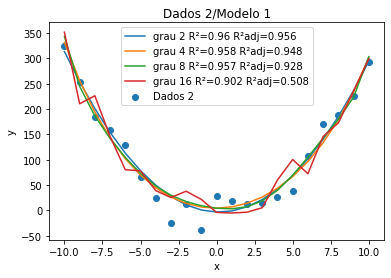

In [ ]:
y = dados["Dados 2"]
plt.scatter(x,y,label="Dados 2")
plt.title("Dados 2/Modelo 1")
plt.xlabel("x")
plt.ylabel("y")

for d in [2,4,8,16]:
  p = d+1
  coefs = modelos_poli["Dados 1"][d] #Usando modelo 1
  yhat = pylab.polyval(coefs, x)
  R2 = r2_score(y,yhat)
  R2ajustado = 1-(1-R2)*((n-1)/(n-p))

  plt.plot(x,yhat,label="grau "+str(d)+" R²="+str(round(R2,3))+" R²adj="+str(round(R2ajustado,3)))

plt.legend()
plt.show()

O que aconteceu? Por que o $R^2$ caiu?

Quando aumentamos a complexidade do modelo (grau do polinômio) aumentamos o ajuste aos dados de treinamento, mas se os dados tem algum “ruído”, **modelos mais complexos tendem a se ajustar ao “ruído” desconsiderando as tendências gerais observadas nos dados**.

##3.2 Exemplo (Modelo quadrático em uma linha perfeita)

Considere o conjunto de dados abaixo de uma linha perfeita. O que acontece se estimarmos o modelo de regressão quadrático $y = q_0 + q_1 x + q_2x^2$ a estes dados?

x | y |
---|---|
0 | 0
1  | 1
2 | 2
3 | 3

E se os dados forem ligeiramente diferentes (um pequeno erro de medição na terceira observação), o que acontece?

x | y |
---|---|
0 | 0
1  | 1
2 | 2
3 | 3.1

**Solução**: Abaixo vamos construir um modelo com os dados originais e vamos fazer uma previsão com este modelo para $x=20$. Podemos considerar este ponto como um dado de teste para o qual queremos que o modelo generalize.


q2= -1.091101152335923e-16 q1= 0.9999999999999999 q0= 2.272954252276914e-16


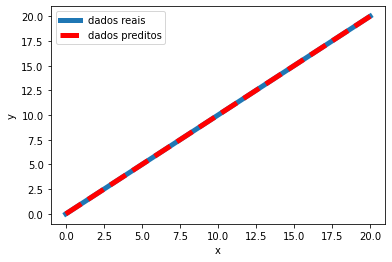

In [ ]:
x = np.array([0,1,2,3])
y = x
coefs = pylab.polyfit(x,y,2)
print("q2=",coefs[0],"q1=",coefs[1],"q0=",coefs[2])

xnovo = np.array([0,1,2,3,20]) #acrescentando o dado de teste ao modelo
yhat = pylab.polyval(coefs, xnovo)

plt.plot(xnovo,xnovo,label="dados reais",linewidth=5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xnovo,yhat,'r--',linewidth=5,label="dados preditos")
plt.legend()
plt.show()

Os valores de $q_0$ e $q_2$ são praticamente 0, como esperado pela teoria. Além disso, a previsão para ($x=20$) é acurada.

Agora vamos considerar os dados com erro de medição

q2= 0.024999999999999946 q1= 0.955 q0= 0.005000000000000089


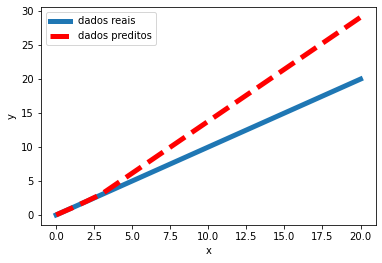

In [ ]:
x = np.array([0,1,2,3])
y = np.array([0,1,2,3.1])
coefs = pylab.polyfit(x,y,2)
print("q2=",coefs[0],"q1=",coefs[1],"q0=",coefs[2])

xnovo = np.array([0,1,2,3,20]) #acrescentando o dado de teste ao modelo
yhat = pylab.polyval(coefs, xnovo)

plt.plot(xnovo,xnovo,label="dados reais",linewidth=5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xnovo,yhat,'r--',linewidth=5,label="dados preditos")
plt.legend()
plt.show()

Como vemos, o valor de $q_2$ mudou porque o modelo está tentando adequar-se ao ruído no dado.

Observe abaixo o que aconteceria para um modelo linear. Nós construímos o modelo e o usamos para prever à frente ($x=20$). Observe que há ainda um desvio ($q_1 = 1.03$) causado pelo erro de medição, mas ele foi menos significativo neste cado.

q1= 1.0300000000000002 q0= -0.01999999999999997


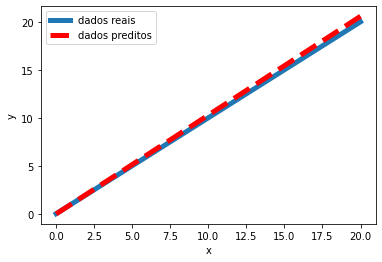

In [ ]:
x = np.array([0,1,2,3])
y = np.array([0,1,2,3.1])
coefs = pylab.polyfit(x,y,1)
print("q1=",coefs[0],"q0=",coefs[1])

xnovo = np.array([0,1,2,3,20]) #acrescentando o dado de teste ao modelo
yhat = pylab.polyval(coefs, xnovo)

plt.plot(xnovo,xnovo,label="dados reais",linewidth=5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xnovo,yhat,'r--',linewidth=5,label="dados preditos")
plt.legend()
plt.show()

##3.3 Validação Cruzada

Como vimos, escolher um modelo mais complexo pode levar ao **sobreajuste** (*overfitting*) aos dados de treino, aumentando o risco de má generalização do modelo. Por outro lado, escolher um modelo pouco complexo pode ter outros problemas, como nós vimos no caso dos dados misteriosos.

Em todo caso, a validação cruzada pode nos ajudar na escolha do modelo mais adequado. Temos diversas técnicas de validação cruzada.

Para um conjunto **pequeno de dados**, por exemplo, podemos usar o método *leave-one-out*. Neste caso, removemos um dado, e usamos os demais pontos como dados de treinamento. O ponto retirado é usado como dado de teste. Repetimos o processo com cada um dos dados presentes. Ao final desse processo, teremos o erro de predição para cada um dos pontos e podemos calcular estatísticas como o erro médio quadrático ou o coeficiente de determinação.

Para um **conjunto grande de dados**  usamos a validação *k-fold*. Nela criamos aleatoriamente $k$ grupos de mesmo tamanho de forma aleatória, preferencialmente. Em seguida criamos um conjunto de treinamento com dados de $k-1$ grupos, geramos o modelo com estes dados e testamos com o grupo que ficou de fora. O processo é repetido de forma que cada grupo seja usado como grupo  de teste.

Uma outra forma de fazer a validação é a **amostragem aleatória repetida**, nela dividimos os dados aleatoriamente em dois grupos (treino e teste) de mesmo tamanho ou de ainda de tamanhos diferentes. Repetimos o processo diversas vezes. Em certas situações podemos fazer este processo apenas uma vez.

A validação cruzada é largamente utilizada atualmente, porque permite a comparação de modelos de aprendizagem estatística contra outros tipos de modelos.



##3.4 Resumindo...

* $R^2$ é usado para avaliar o modelo, mas não é sempre melhor (*overfitting*)
* Escolha o modelo baseado em
  * Teoria sobre os dados
  * Validação cruzada
  * Simplicidade


#4 Previsão

Para que servem os modelos?

* Nos ajudam a entender o processo que gerou os dados  
  * Ex: constante elástica de uma mola
* Nos ajudam a prever situações não medidas
  * Ex: prever a deformação da mola quando uma força é aplicada
  * Ex: prever como um sistema reagirá a um ajuste de configuração

Modelos de regressão linear estatística nos permitem fazer previsões e, mais que isso, previsões intervalares.

As previsões podem ser interpolações ou extrapolações. De forma geral, modelos de regressão são bons interpoladores, mas para extrapolação devem ser usados com cuidado. Em outras palavras, queremos dizer que **a incerteza tende a aumentar conforme nos afastamos da região de domínio das observações**.

##4.1 Intervalo de confiança e Intervalo de predição

A partir dos coeficientes e da variância estimada pelo modelo de regressão linear, podemos prever dois intervalos diferentes: o **intervalo de confiança** para $E(Y|\textbf{x}^*)$ e o **intervalo de predição** de $Y|\textbf{x}^*$.

O IC para $E(Y|\textbf{x}^*)$ é dado por

$\hat{y_i} \pm |t_{\frac{\alpha}{2};n-p}|\sqrt{\hat{\sigma}^2\textbf{x}^{*^T}(X^TX)^{-1}\textbf{x}^*} $

em que $t_{\frac{\alpha}{2};n-p}$ é o valor da distribuição T de Student com $n-p$ graus de liberdade tal que $t_{\frac{\alpha}{2};n-p} = F_{\text{n-p}}(\frac{\alpha}{2})$.

Já o IP para $Y|\textbf{x}^*$ tem apenas uma sutil diferença: ele agrega ao erro na estimação da média a variabilidade inerente da variável aleatória $Y$, como vê-se abaixo:

$\hat{y_i} \pm |t_{\frac{\alpha}{2};n-p}|\sqrt{\hat{\sigma}^2(1 + \textbf{x}^{*^T}(X^TX)^{-1}\textbf{x}^*)} $.

O intervalo de confiança para $E(Y|\textbf{x}^*)$ e o intervalo de predição para $Y|\textbf{x}^*$ aumentam conforme $\textbf{x}^*$ se move do centro (**centróide**) dos dados observados. Isto ocorre, porque nós <u>temos maior certeza sobre nossas previsões no centro do que nas bordas</u> (onde começamos a extrapolar)

O IP para $Y|\textbf{x}^*$ é similar ao IC para $E(Y|\textbf{x}^*)$, exceto que o IP cobre uma região muito maior porque foca no valor futuro aleatório de $Y|\textbf{x}^*$, enquanto que o IC para $E(Y|\textbf{x}^*)$ estima o valor esperado de $Y$ dado $\textbf{x}^*$. Em outras palavras, o IP considera a flutuação de $Y|\textbf{x}^*$ em torno de $E(Y|\textbf{x}^*)$, enquanto que o IC apenas considera a incerteza na estimativa de um valor médio.

##4.2 Exemplo (Dados meteorológicos)

Considere os dados das temperaturas médias dos estados unidos abaixo. Os dados ilustram a mudança da média a cada ano.

Crie um modelo de regressão linear simples com o ano como variável regressora e a temperatura como variável dependente. Observe que séries temporais costumam apresentar autocorrelação (valores passados influenciam valores futuros), que não é capturada pelo modelo de regressão linear. Neste caso desconsideraremos este efeito.

Verifique a qualidade do modelo pela análise dos resíduos e faça previsões intervalares até 2030, e então até 2200.



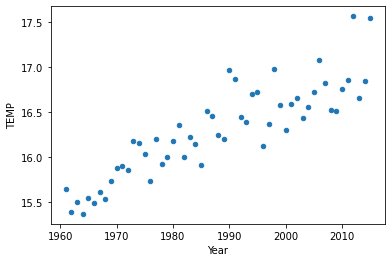

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Temperatura diaria de 21 cidades americanas
df = pd.read_csv("temperatures.csv")
df['DateTime'] = pd.to_datetime(df['DATE'].astype(str), format='%Y%m%d')
#Temperatura média anual de cada cidade
df_max = df.groupby(['CITY',df.DateTime.dt.year]).mean()
df_max.index.names = ['CITY','Year']
df_max=df_max.reset_index()
#Temperatura média anual americana
df_anual = df_max.groupby('Year').mean()
df_anual = df_anual.reset_index()

df_anual.plot.scatter(x='Year',y='TEMP')
plt.show()

### Regressão e Análise dos Resíduos

Teste Shapiro-Wilk para normalidade
(0.9580456018447876, 0.052707210183143616)


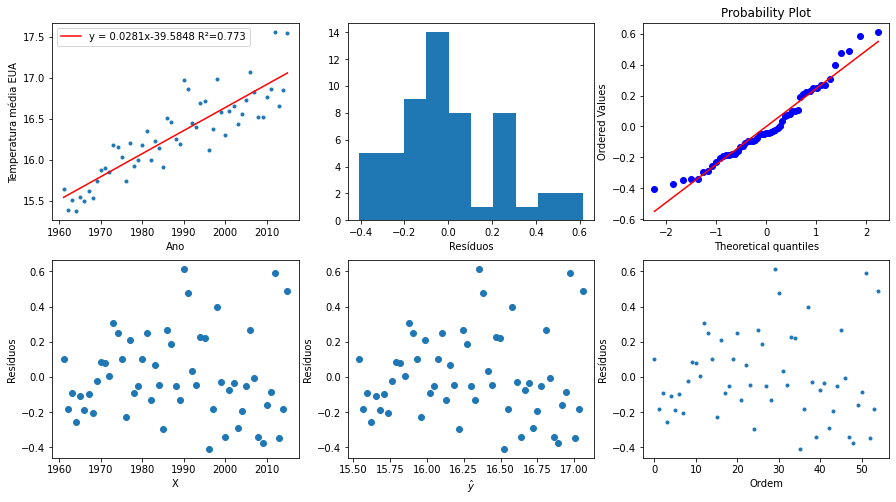

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import scipy.stats as st

lm = linear_model.LinearRegression()
x = np.array(df_anual.Year).reshape(-1,1)
y = df_anual.TEMP
modelo = lm.fit(x,y)
yhat = modelo.predict(x)
R2 = r2_score(y,yhat)
b1 = round(modelo.coef_[0],4)
b2 = round(modelo.intercept_,4)

lbl = "y = "+str(b1)+"x"+str(b2)
lbl += " R²="+str(round(R2,3))

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.plot(x,y,'.')
plt.plot(x,yhat,'r',label=lbl)
plt.xlabel("Ano")
plt.ylabel("Temperatura média EUA")
plt.legend()

#analise de residuos
e = y - yhat
print("Teste Shapiro-Wilk para normalidade")
print(st.shapiro(e))

plt.subplot(2,3,2)
plt.hist(e)
plt.xlabel("Resíduos")

plt.subplot(2,3,3)
st.probplot(e, dist="norm",plot=plt)

plt.subplot(2,3,4)
plt.scatter(x,e)
plt.xlabel("X")
plt.ylabel("Resíduos")

plt.subplot(2,3,5)
plt.scatter(yhat,e)
plt.xlabel("$\hat{y}$")
plt.ylabel("Resíduos")

plt.subplot(2,3,6)
plt.plot(e,'.')
plt.xlabel("Ordem")
plt.ylabel("Resíduos")
plt.show()

### Prevendo até 2030

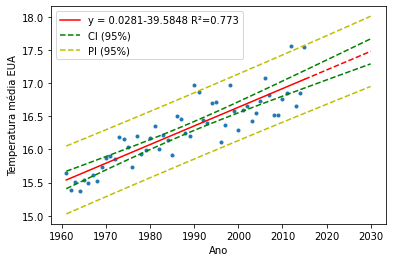

In [ ]:
import scipy.stats as st

def calcIntervalos(x,X,yobs,ypred,alpha):
  n,k = X.shape
  p = k+1

  e = yobs - ypred
  SSE = np.sum(e**2)
  sigma2_hat = SSE/(n-p)

  ones = np.ones((n,1))
  X1 = np.hstack((ones,X))
  C = np.linalg.inv(np.dot(X1.transpose(),X1))
  x1 = np.hstack((1,x))
  mul = np.dot(np.dot(x1.transpose(),C),x1)
  int1 = np.abs(st.t.ppf(alpha/2,n-p))*np.sqrt(sigma2_hat*mul)
  int2 = np.abs(st.t.ppf(alpha/2,n-p))*np.sqrt(sigma2_hat*(1+mul))
  return int1,int2

x1 = np.arange(2015,2031).reshape(-1,1)
yhat1 = modelo.predict(x1)

ci = []
pi = []
for i in range(len(yhat)):
  int1,int2 = calcIntervalos(x[i],x,y,yhat,0.05)
  ci.append(int1)
  pi.append(int2)
for i in range(len(yhat1)):
  int1,int2 = calcIntervalos(x1[i],x,y,yhat,0.05)
  ci.append(int1)
  pi.append(int2)

xtotal = np.hstack((x.transpose(),x1.transpose())).transpose()
ytotal = np.hstack((yhat.transpose(),yhat1.transpose()))
ci = np.array(ci)
pi = np.array(pi)

plt.plot(x,y,'.')
plt.plot(x,yhat,'r',label=lbl)
plt.plot(x1,yhat1,'r--')
plt.plot(xtotal,ytotal-ci,'g--',label="CI (95%)")
plt.plot(xtotal,ytotal+ci,'g--')
plt.plot(xtotal,ytotal-pi,'y--',label="PI (95%)")
plt.plot(xtotal,ytotal+pi,'y--')
plt.xlabel("Ano")
plt.ylabel("Temperatura média EUA")
plt.legend()
plt.show()

### Prevendo até 2200

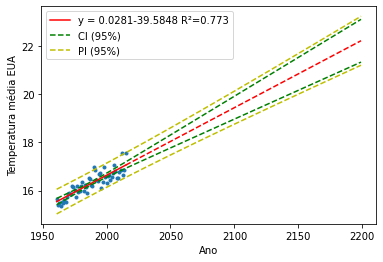

In [ ]:
x1 = np.arange(2015,2200).reshape(-1,1)
yhat1 = modelo.predict(x1)

ci = []
pi = []
for i in range(len(yhat)):
  int1,int2 = calcIntervalos(x[i],x,y,yhat,0.05)
  ci.append(int1)
  pi.append(int2)
for i in range(len(yhat1)):
  int1,int2 = calcIntervalos(x1[i],x,y,yhat,0.05)
  ci.append(int1)
  pi.append(int2)

xtotal = np.hstack((x.transpose(),x1.transpose())).transpose()
ytotal = np.hstack((yhat.transpose(),yhat1.transpose()))
ci = np.array(ci)
pi = np.array(pi)

plt.plot(x,y,'.')
plt.plot(x,yhat,'r',label=lbl)
plt.plot(x1,yhat1,'r--')
plt.plot(xtotal,ytotal-ci,'g--',label="CI (95%)")
plt.plot(xtotal,ytotal+ci,'g--')
plt.plot(xtotal,ytotal-pi,'y--',label="PI (95%)")
plt.plot(xtotal,ytotal+pi,'y--')
plt.xlabel("Ano")
plt.ylabel("Temperatura média EUA")
plt.legend()
plt.show()

# Aspectos finais

* Como todas as demais aplicações da estatística, o tema da regressão é mais profundo e têm diversos temas que não foram tratados aqui, tais como: regularização, uso de variáveis categóricas, regressão logística etc.
* Um passo importante quando fazemos a regressão múltipla com diferentes variáveis é fazer a normalização dos dados.
* A divisão de dados em treino e teste é uma forma útil de comparar diferentes modelos de regressão, mesmo aqueles que são não-paramétricos.